Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

https://medium.com/analytics-vidhya/regression-flight-price-prediction-6771fc4d1fb3

https://www.analyticsvidhya.com/blog/2021/06/flight-price-prediction-a-regression-analysis-using-lazy-prediction/

In [1]:
# importing the module which is required to read the file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('FTData_Train.csv') # Reading the file

In [3]:
data3 = pd.read_csv('FTSample_submission.csv')  # Reading the file

In [4]:
data2 = pd.read_csv('FTTest_set.csv') # Reading the file

In [5]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
data3

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
data1['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [12]:
data1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
data1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [14]:
data1['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [15]:
data1['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [16]:
data1['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [17]:
data1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [18]:
data1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
data1['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [20]:
category =['Airline','Source','Destination','Additional_Info']

In [21]:
for i in category:
    print(i, data1[i].unique())
    print('---------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
---------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
---------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
---------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
---------------------------------


In [22]:
# Treating Date column

data1.Date_of_Journey = data1.Date_of_Journey.str.split('/')
data1.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [23]:
data1['Date'] = data1.Date_of_Journey.str[0]
data1['Month'] = data1.Date_of_Journey.str[1]
data1['Year'] = data1.Date_of_Journey.str[2]

In [24]:
data1.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [25]:
data1['Route'].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [26]:
data1.Route = data1.Route.str.split('?')

In [27]:
data1['City1'] = data1.Route.str[0]
data1['City2'] = data1.Route.str[1]
data1['City3'] = data1.Route.str[2]
data1['City4'] = data1.Route.str[3]
data1['City5'] = data1.Route.str[4]
data1['City6'] = data1.Route.str[5]

In [28]:
data1['City4'].value_counts()


 COK     1113
 BLR      302
 DEL       75
 HYD       30
 BOM       25
 DEL        8
 TRV        4
 HYD        3
 GWL        2
 BBI        1
 NAG        1
 BHO        1
 AMD        1
Name: City4, dtype: int64

In [29]:
# Treating dep time column

data1.Dep_Time = data1.Dep_Time.str.split(':')

data1['Dep_Time_Hour'] = data1.Dep_Time.str[0]
data1['Dep_Time_Min'] = data1.Dep_Time.str[1]

In [30]:
data1.Arrival_Time = data1.Arrival_Time.str.split(' ')
data1['Arrival_date'] = data1.Arrival_Time.str[1]

In [31]:
data1['Time_of_Arrival'] = data1.Arrival_Time.str[0]

In [32]:
data1['Time_of_Arrival'] = data1.Time_of_Arrival.str.split(':')

In [33]:
data1['Arrival_Time_Hour'] = data1.Time_of_Arrival.str[0]
data1['Arrival_Time_Min'] = data1.Time_of_Arrival.str[1]

In [34]:
# Treating the duration column

data1.Duration = data1.Duration.str.split(' ')

Define Hour

In [35]:
data1['Travel_hours'] = data1.Duration.str[0]

In [36]:
data1['Travel_hours'] = data1['Travel_hours'].str.split('h')

In [37]:
data1['Travel_hours'] = data1['Travel_hours'].str[0]

In [38]:
data1.Travel_hours = data1.Travel_hours

Define Min

In [39]:
data1['Travel_mins'] = data1.Duration.str[1]

In [40]:
data1.Travel_mins = data1.Travel_mins.str.split('m')

In [41]:
data1.Travel_mins = data1.Travel_mins.str[0]

In [42]:
# Treating the total stops columns

data1.Total_Stops.replace('non-stop','0',inplace = True)
data1.Total_Stops = data1.Total_Stops.str.split(' ')
data1.Total_Stops = data1.Total_Stops.str[0]

In [43]:
# Additional info

data1.Additional_Info.unique()
data1.Additional_Info.replace('No Info', 'No info', inplace = True)

### Imputation

In [44]:
data1.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

In [45]:
# City 1 has emploty column, we will check the data and replace it sicne this implies that the route iss not available

data1[data1['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No info,...,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


In [46]:
data1[data1['City2'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No info,...,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


**both are the same. it mean city 1 and city 2 are source and destination**

In [47]:
## filling city 3 as None, since the missing values are less, we will assign a sepertw category to this column as None

data1['City3'].fillna('None', inplace = True)

In [48]:
## filling city 3 as None, since the missing values are less, we will assign a sepertw category to this column as None

data1['City1'].fillna('DEL', inplace = True)

In [49]:
## filling city 3 as None, since the missing values are less, we will assign a sepertw category to this column as None

data1['City2'].fillna('COK', inplace = True)

In [50]:
# filling the null values in Arrival date with values in Departure date, since the NaN

# values are these dates which departed and arrived on the same date

data1['Arrival_date'].fillna(data1['Date'], inplace = True)

In [51]:
# filling NaN values in Travel mins as 0 since the minutes data is not valid for these (reached in hour units)

data1['Travel_mins'].fillna(0, inplace = True)

Using the above steps, we were successfully able to treat all the missing values from our data. We again check the info in our data and find out that the dataset still has data types for multiple columns as 'object', where it should be 'int'-

In [52]:
data1['Total_Stops'].fillna(0, inplace = True)
data1.Total_Stops = data1.Total_Stops.astype('int64')

In [53]:
data1 = data1.drop(['City4','City5','City6','Route','Date_of_Journey','Dep_Time','Arrival_Time','Duration','Time_of_Arrival'], axis =1)

In [54]:
# check data.info; dtype; describe; isnull
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  int64 
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10683 non-null  object
 10  City2              10683 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Min       10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Min   10683 non-null  objec

In [55]:
data1[data1['Travel_hours'] == '5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,03,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [56]:
data1.drop(index=6474, inplace = True, axis =0)

In [57]:
#change datatype

data1.Date = data1.Date.astype('int64')
data1.Month = data1.Month.astype('int64')
data1.Year = data1.Year.astype('int64')
data1.Dep_Time_Hour = data1.Dep_Time_Hour.astype('int64')
data1.Dep_Time_Min = data1.Dep_Time_Min.astype('int64')
data1.Arrival_date = data1.Arrival_date.astype('int64')
data1.Travel_mins = data1.Travel_mins.astype('int64')
data1.Arrival_Time_Hour = data1.Arrival_Time_Hour.astype('int64')
data1.Arrival_Time_Min = data1.Arrival_Time_Min.astype('int64')
data1.Travel_hours = data1.Travel_hours.astype('int64')

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Min       10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Min   10682 non-null  int64

In [59]:
catcol =  'Airline', 'Source', 'Destination', 'Additional_Info', 'City1','City2', 'City3', 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

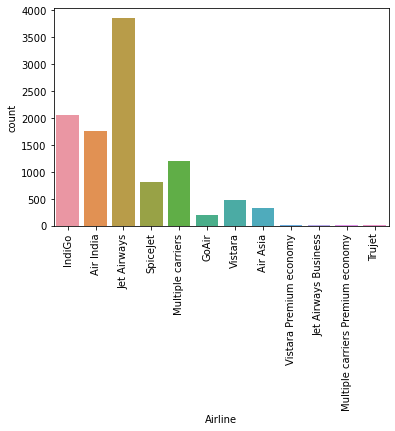

In [60]:
sns.countplot(data1['Airline'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

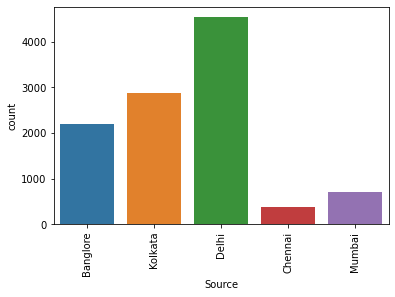

In [61]:
sns.countplot(data1['Source'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

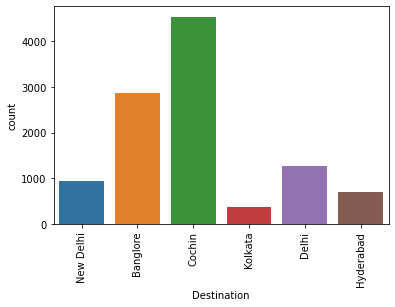

In [62]:
sns.countplot(data1['Destination'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, '1 Long layover'),
  Text(5, 0, 'Change airports'),
  Text(6, 0, 'Business class'),
  Text(7, 0, 'Red-eye flight'),
  Text(8, 0, '2 Long layover')])

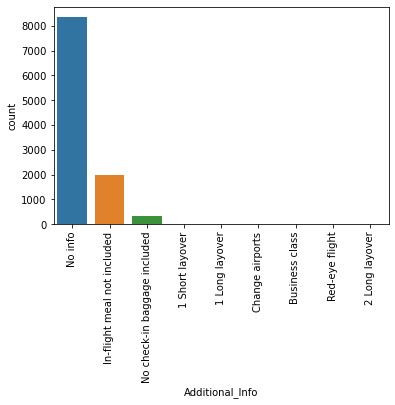

In [63]:
sns.countplot(data1['Additional_Info'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BLR '),
  Text(1, 0, 'CCU '),
  Text(2, 0, 'DEL '),
  Text(3, 0, 'MAA '),
  Text(4, 0, 'BOM '),
  Text(5, 0, 'DEL')])

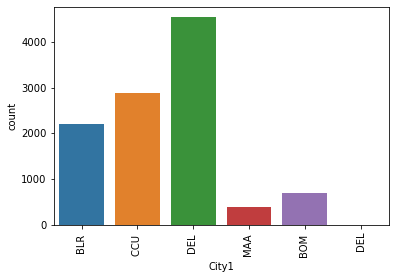

In [64]:
sns.countplot(data1['City1'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, ' DEL'),
  Text(1, 0, ' IXR '),
  Text(2, 0, ' LKO '),
  Text(3, 0, ' NAG '),
  Text(4, 0, ' BLR'),
  Text(5, 0, ' BOM '),
  Text(6, 0, ' BLR '),
  Text(7, 0, ' CCU'),
  Text(8, 0, ' AMD '),
  Text(9, 0, ' PNQ '),
  Text(10, 0, ' CCU '),
  Text(11, 0, ' COK '),
  Text(12, 0, ' IDR '),
  Text(13, 0, ' GAU '),
  Text(14, 0, ' MAA '),
  Text(15, 0, ' HYD '),
  Text(16, 0, ' COK'),
  Text(17, 0, ' DEL '),
  Text(18, 0, ' HYD'),
  Text(19, 0, ' BHO '),
  Text(20, 0, ' JAI '),
  Text(21, 0, ' ATQ '),
  Text(22, 0, ' JDH '),
  Text(23, 0, ' BBI '),
  Text(24, 0, ' GOI '),
  Text(25, 0, ' BDQ '),
  Text(26, 0, ' TRV '),
  Text(27, 0, ' IXU '),
  Text(28, 0, ' IXB '),
  Text(29, 0, ' UDR '),
  Text(30, 0, ' RPR '),
  Text(31, 0, ' DED '),
  Text(32, 0, ' VGA '),
  Text(33, 0,

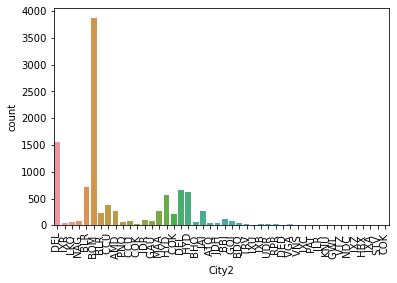

In [65]:
sns.countplot(data1['City2'])
plt.xticks(rotation = 90)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'None'),
  Text(1, 0, ' BBI '),
  Text(2, 0, ' BOM '),
  Text(3, 0, ' BLR'),
  Text(4, 0, ' DEL'),
  Text(5, 0, ' COK'),
  Text(6, 0, ' DEL '),
  Text(7, 0, ' AMD '),
  Text(8, 0, ' HYD'),
  Text(9, 0, ' JDH '),
  Text(10, 0, ' MAA '),
  Text(11, 0, ' COK '),
  Text(12, 0, ' GOI '),
  Text(13, 0, ' NAG '),
  Text(14, 0, ' GAU '),
  Text(15, 0, ' BHO '),
  Text(16, 0, ' IXR '),
  Text(17, 0, ' IDR '),
  Text(18, 0, ' ISK '),
  Text(19, 0, ' HYD '),
  Text(20, 0, ' VGA '),
  Text(21, 0, ' PNQ '),
  Text(22, 0, ' JAI '),
  Text(23, 0, ' TRV '),
  Text(24, 0, ' HBX '),
  Text(25, 0, ' IMF '),
  Text(26, 0, ' CCU '),
  Text(27, 0, ' UDR '),
  Text(28, 0, ' VTZ '),
  Text(29, 0, ' IXC ')])

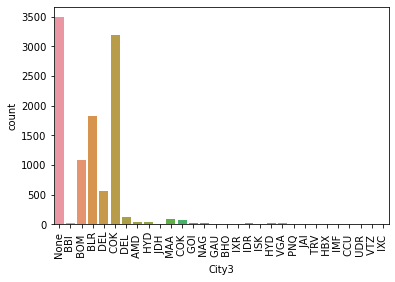

In [66]:
sns.countplot(data1['City3'])
plt.xticks(rotation = 90)

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Min       10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Min   10682 non-null  int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

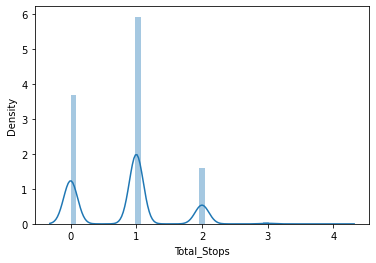

In [68]:
sns.distplot(data1['Total_Stops'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

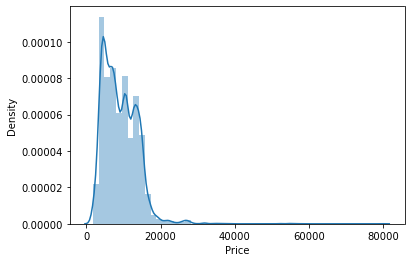

In [69]:
sns.distplot(data1['Price'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Date', ylabel='Density'>

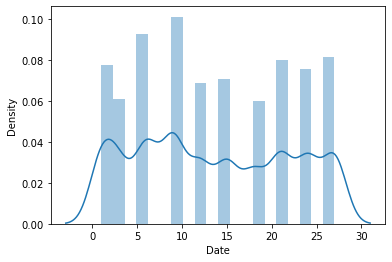

In [70]:
sns.distplot(data1['Date'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Month', ylabel='Density'>

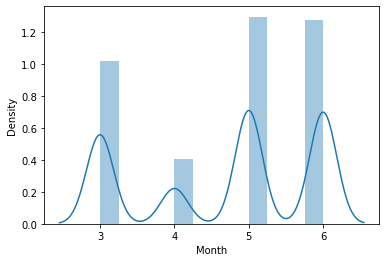

In [71]:
sns.distplot(data1['Month'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

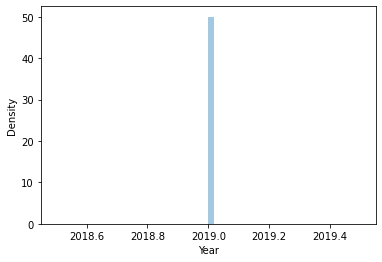

In [72]:
sns.distplot(data1['Year'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='Density'>

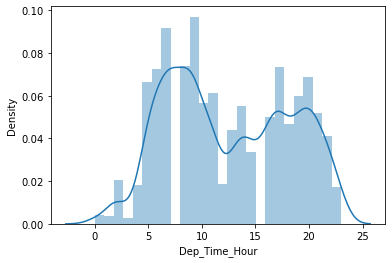

In [73]:
sns.distplot(data1['Dep_Time_Hour'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dep_Time_Min', ylabel='Density'>

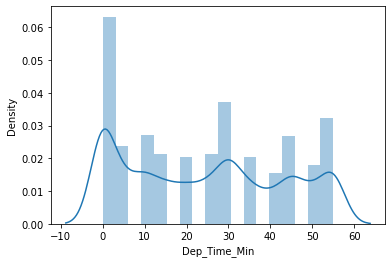

In [74]:
sns.distplot(data1['Dep_Time_Min'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival_date', ylabel='Density'>

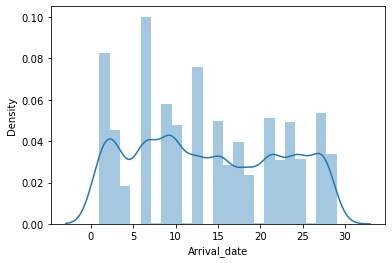

In [75]:
sns.distplot(data1['Arrival_date'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival_Time_Hour', ylabel='Density'>

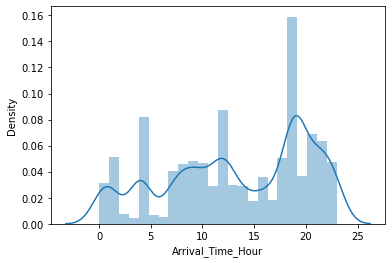

In [76]:
sns.distplot(data1['Arrival_Time_Hour'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival_Time_Min', ylabel='Density'>

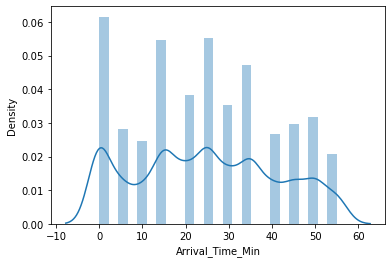

In [77]:
sns.distplot(data1['Arrival_Time_Min'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Travel_hours', ylabel='Density'>

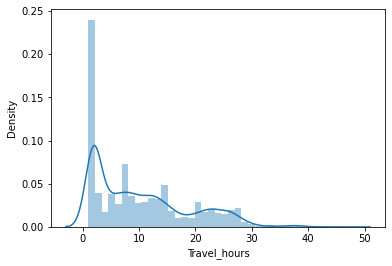

In [78]:
sns.distplot(data1['Travel_hours'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Travel_mins', ylabel='Density'>

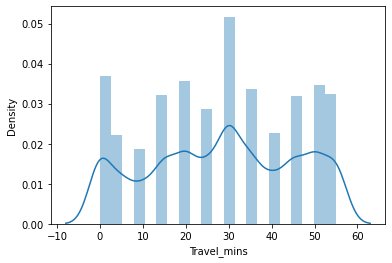

In [79]:
sns.distplot(data1['Travel_mins'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

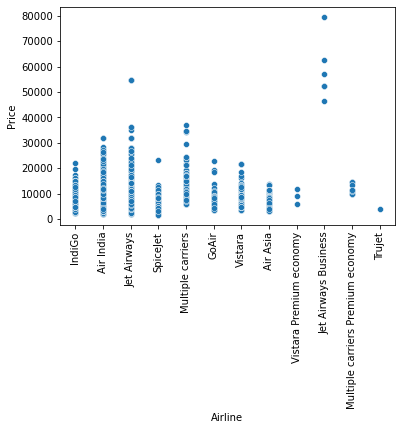

In [80]:
sns.scatterplot(x = data1['Airline'], y = data1.Price)
plt.xticks(rotation =90)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

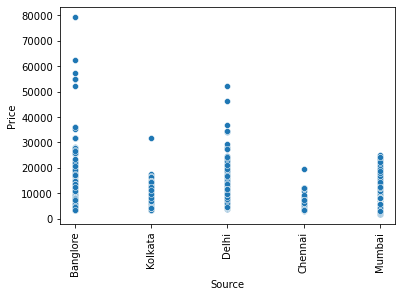

In [81]:
sns.scatterplot(x = data1['Source'], y = data1.Price)
plt.xticks(rotation =90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

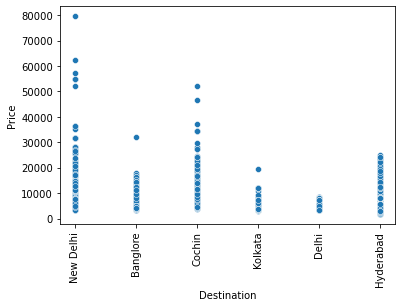

In [82]:
sns.scatterplot(x = data1['Destination'], y = data1.Price)
plt.xticks(rotation =90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

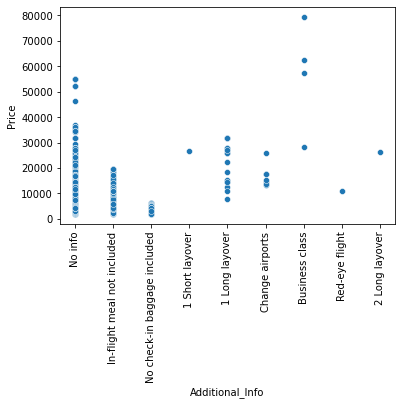

In [83]:
sns.scatterplot(x = data1['Additional_Info'], y = data1.Price)
plt.xticks(rotation =90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

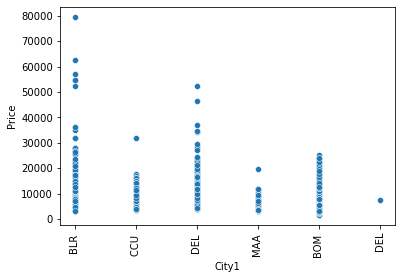

In [84]:
sns.scatterplot(x = data1['City1'], y = data1.Price)
plt.xticks(rotation =90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

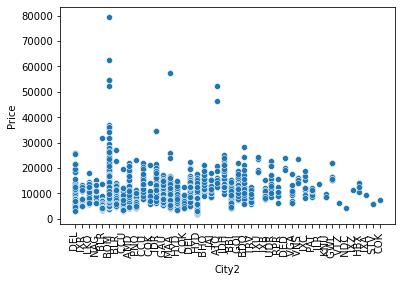

In [85]:
sns.scatterplot(x = data1['City2'], y = data1.Price)
plt.xticks(rotation =90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

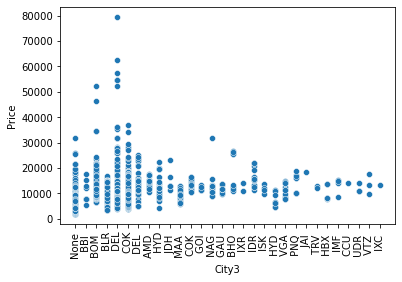

In [86]:
sns.scatterplot(x = data1['City3'], y = data1.Price)
plt.xticks(rotation =90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

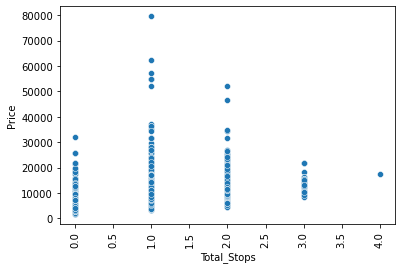

In [87]:
sns.scatterplot(x = data1['Total_Stops'], y = data1.Price)
plt.xticks(rotation =90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

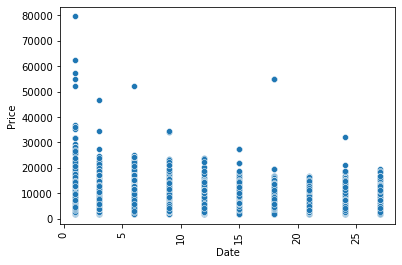

In [88]:
sns.scatterplot(x = data1['Date'], y = data1.Price)
plt.xticks(rotation =90)

(array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

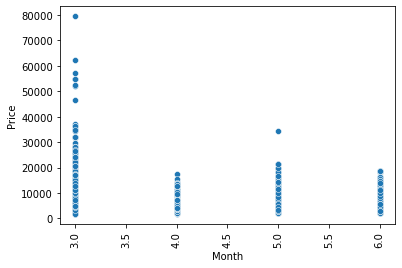

In [89]:
sns.scatterplot(x = data1['Month'], y = data1.Price)
plt.xticks(rotation =90)

(array([1900., 1925., 1950., 1975., 2000., 2025., 2050., 2075., 2100.,
        2125., 2150.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

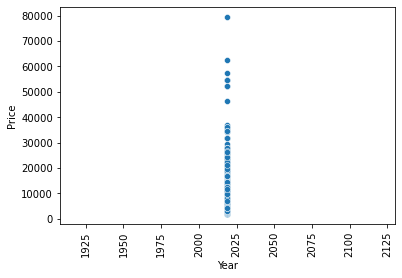

In [90]:
sns.scatterplot(x = data1['Year'], y = data1.Price)
plt.xticks(rotation =90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

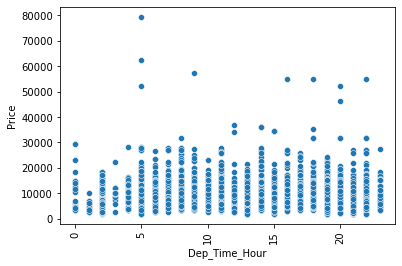

In [91]:
sns.scatterplot(x = data1['Dep_Time_Hour'], y = data1.Price)
plt.xticks(rotation =90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

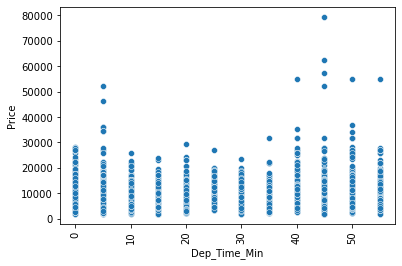

In [92]:
sns.scatterplot(x = data1['Dep_Time_Min'], y = data1.Price)
plt.xticks(rotation =90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

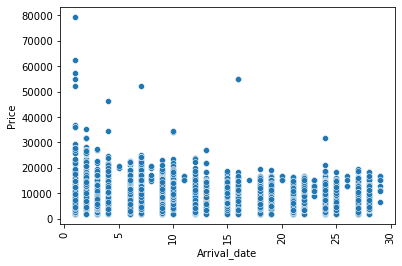

In [93]:
sns.scatterplot(x = data1['Arrival_date'], y = data1.Price)
plt.xticks(rotation =90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

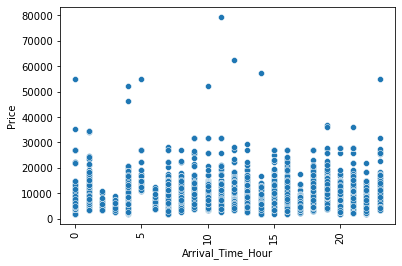

In [94]:
sns.scatterplot(x = data1['Arrival_Time_Hour'], y = data1.Price)
plt.xticks(rotation =90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

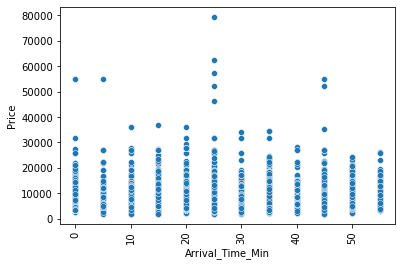

In [95]:
sns.scatterplot(x = data1['Arrival_Time_Min'], y = data1.Price)
plt.xticks(rotation =90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

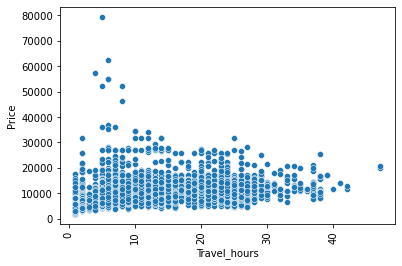

In [96]:
sns.scatterplot(x = data1['Travel_hours'], y = data1.Price)
plt.xticks(rotation =90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

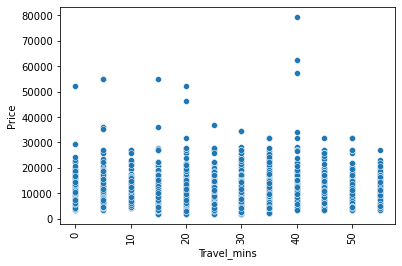

In [97]:
sns.scatterplot(x = data1['Travel_mins'], y = data1.Price)
plt.xticks(rotation =90)

In [98]:
data1 = data1.drop(['Dep_Time_Min','Arrival_Time_Min','Travel_mins','Year','City1'], axis =1)

In [99]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   City2              10682 non-null  object
 9   City3              10682 non-null  object
 10  Dep_Time_Hour      10682 non-null  int64 
 11  Arrival_date       10682 non-null  int64 
 12  Arrival_Time_Hour  10682 non-null  int64 
 13  Travel_hours       10682 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.5+ MB


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


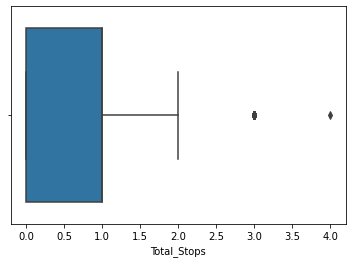

In [100]:
sns.boxplot(data1['Total_Stops'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

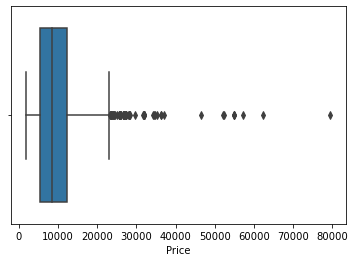

In [101]:
sns.boxplot(data1['Price'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

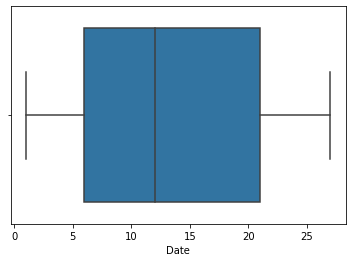

In [102]:
sns.boxplot(data1['Date'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

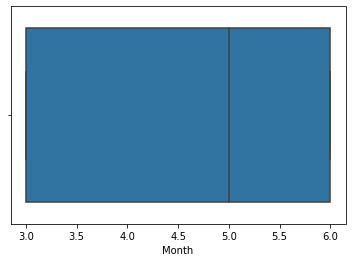

In [103]:
sns.boxplot(data1['Month'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

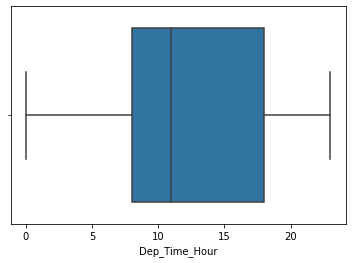

In [104]:
sns.boxplot(data1['Dep_Time_Hour'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

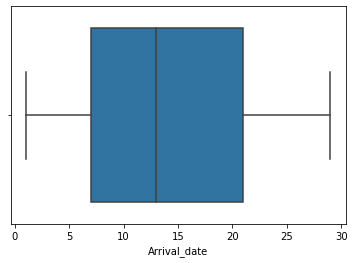

In [105]:
sns.boxplot(data1['Arrival_date'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

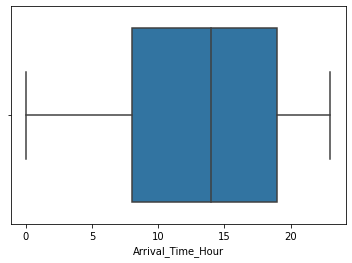

In [106]:
sns.boxplot(data1['Arrival_Time_Hour'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

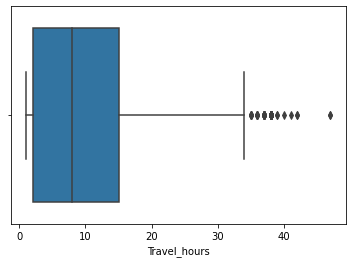

In [107]:
sns.boxplot(data1['Travel_hours'], orient='V')
    
import warnings
warnings.filterwarnings('ignore')

Outlier in Total Hours , total stop and Price

In [108]:
# Checking skkewness

data1.skew()

Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Dep_Time_Hour        0.113224
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Travel_hours         0.850822
dtype: float64

In [109]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data1['Airline'] = LE.fit_transform(data1['Airline'])
data1['Source'] = LE.fit_transform(data1['Source'])
data1['Destination'] = LE.fit_transform(data1['Destination'])
data1['Additional_Info'] = LE.fit_transform(data1['Additional_Info'])
data1['City2'] = LE.fit_transform(data1['City2'])
data1['City3'] = LE.fit_transform(data1['City3'])



In [110]:
x1 = data1.drop(['Price'], axis = 1)
y = data1['Price']

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x1)
x

array([[-0.41080484, -1.65843519,  2.41677843, ...,  0.95574961,
        -1.80031946, -0.97083112],
       [-1.26115217,  0.89029942, -0.97373235, ..., -1.52464819,
        -0.05081299, -0.38223823],
       [ 0.01436882,  0.04072122, -0.29563019, ..., -0.46162056,
        -1.36294284,  1.03038468],
       ...,
       [ 0.01436882, -1.65843519,  0.38247196, ...,  1.54632051,
        -0.3423974 , -0.85311254],
       [ 2.56541078, -1.65843519,  2.41677843, ..., -1.52464819,
         0.09497921, -0.97083112],
       [-1.26115217,  0.04072122, -0.29563019, ..., -0.57973474,
         0.82394024, -0.26451966]])

In [112]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8545, 13)
Shape of x_test : (2137, 13)
Shape of y_train : (8545,)
Shape of y_test : (2137,)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print('accuracy', accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 39.44782405240992
[[ 0  0  2 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         2
        1965       0.89      1.00      0.94        16
        2017       0.40      0.67      0.50         3
        2050       0.00      0.00      0.00         3
        2071       0.00      0.00      0.00         0
        2175       0.00      0.00      0.00         1
        2227       0.33      1.00      0.50         7
        2228       0.00      0.00      0.00         3
        2437       0.00      0.00      0.00         2
        2470       0.00      0.00      0.00         1
        2575       0.33      0.50      0.40         2
        2647       0.00      0.00      0.00         1
        2753       0.00      0.00      0.00         0
        2754       0.20      0.10      0.13        10
      

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt  = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 53.25222274216191
[[ 0  0  1 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         2
        1965       1.00      0.94      0.97        16
        2017       0.67      0.67      0.67         3
        2050       1.00      0.33      0.50         3
        2175       1.00      1.00      1.00         1
        2227       0.75      0.86      0.80         7
        2228       1.00      0.33      0.50         3
        2385       0.00      0.00      0.00         0
        2437       0.50      0.50      0.50         2
        2470       0.00      0.00      0.00         1
        2575       0.33      0.50      0.40         2
        2647       1.00      1.00      1.00         1
        2753       0.00      0.00      0.00         0
        2754       0.83      0.50      0.62        10
      

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

MemoryError: could not allocate 109117440 bytes

In [116]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

ad_pred = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

Accuracy 40.570893776321945
[[ 0  0  2 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         2
        1965       0.89      1.00      0.94        16
        2017       0.38      1.00      0.55         3
        2050       0.00      0.00      0.00         3
        2071       0.00      0.00      0.00         0
        2175       0.00      0.00      0.00         1
        2227       0.37      1.00      0.54         7
        2228       0.00      0.00      0.00         3
        2437       0.00      0.00      0.00         2
        2470       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         2
        2647       0.00      0.00      0.00         1
        2754       0.00      0.00      0.00        10
        3100       0.58      1.00      0.74        14
     

cross vald

In [117]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : nan


In [118]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model:", scr.mean())

Cross validation score of Random Forest model: nan


In [1]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model :", scr.mean())

NameError: name 'cross_val_score' is not defined

Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


# Creating parameter list
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion': ['gini', 'entropy']}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring="accuracy")
GCV.fit(x_train, y_train) # Fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridsearchCV

In [ ]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred)  # Checking final accuracy